<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Santiago Romero Riggen y José Navarro Silva.

**Fecha:** 10 de Junio del 2021.

**Expediente** : if715099 y 722399.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: 

# Tarea 4: Clase 7

### Ejercicio 1: 

Como ejemplo simple de una simulación de Monte Carlo, considere calcular la probabilidad de una suma particular del lanzamiento de tres dados (cada dado tiene valores del uno al seis). Además cada dado tiene las siguientes carácterísticas: el primer dado no está cargado (distribución uniforme todos son equiprobables); el segundo y tercer dado están cargados basados en una distribución binomial con parámetros (`n=5, p=0.5` y `n=5, p=0.2`). Calcule la probabilidad de que la suma resultante sea 7, 14 o 18. 

Código de solución estudiante 1

In [11]:
# Código de solución Santiago Romero
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
N=10000
d_no_cargado = np.random.randint(1,7,N)
d_cargado1 = st.binom(n=5, p=.5).rvs(size = N)
d_cargado2 = st.binom(n=5, p=.2).rvs(size = N)

suma =  d_no_cargado + d_cargado1 + d_cargado2
y, x = np.histogram(suma, bins=18, density=True)

prob7 = len(suma[suma==7]) / len(suma)
prob14 = len(suma[suma==14]) / len(suma)
prob18 = len(suma[suma==18]) / len(suma)

round(prob7,4), round(prob14,4), round(prob18,4)

(0.1642, 0.0006, 0.0)

Código de solución estudiante 2 - Tonatiuh Navarro

<BarContainer object of 6 artists>

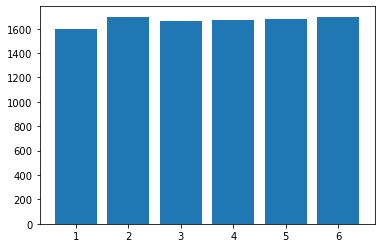

In [3]:
# Código de solución estudiante 2
# DADO NO CARGADO

 
N = 10**4
d_no_cargado = np.random.randint(1,7,N)
x,y = np.histogram(d_no_cargado, bins=6)

#plt.hist(d_no_cargado, bins=40, density = True);
plt.bar(range(1,7),x)

<BarContainer object of 6 artists>

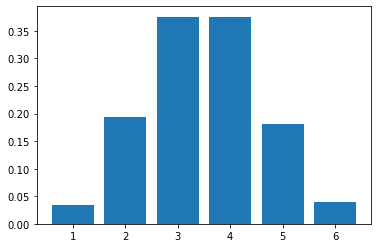

In [4]:
# DADO CARGADO1

 
d_cargado = st.binom(n=5, p=0.5).rvs(size=N)
x,y = np.histogram(d_cargado, bins=6, density=True)

plt.bar(range(1, 7), x)

<BarContainer object of 6 artists>

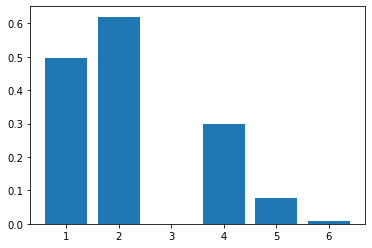

In [5]:
# DADO CARGADO 2

d_cargado2 = st.binom(n=5,p=0.2).rvs(size=N)
x,y = np.histogram(d_cargado2, bins=6, density=True)

plt.bar(range(1,7),x)

In [6]:
tres_dados = d_cargado+d_cargado2+d_no_cargado


prob7 = list(tres_dados).count(7)/len(tres_dados)
prob14 = list(tres_dados).count(14)/len(tres_dados)
prob18 = list(tres_dados).count(18)/len(tres_dados)

print('La probabilidad de que la suma de los 3 dados sea 7 es de:',prob7, 
    ', que sea 14 es de:',prob14,
    'y de que sea 18 es de:',prob18)

La probabilidad de que la suma de los 3 dados sea 7 es de: 0.1565 , que sea 14 es de: 0.0006 y de que sea 18 es de: 0.0


# 2 Ejercicio de aplicación- Cafetería Central

Premisas para la simulación:
- Negocio de alimentos que vende bebidas y alimentos.
- Negocio dentro del ITESO.
- Negocio en cafetería central.
- Tipo de clientes (hombres y mujeres).
- Rentabilidad del 60%.

## Objetivo
Realizar una simulación estimado el tiempo medio que se tardaran los clientes en ser atendidos entre el horario de 6:30 a 1 pm. Además saber el consumo. 
**Analizar supuestos y limitantes**

## Supuestos en simulación
Clasificación de clientes: 
- Mujer  = 1 $\longrightarrow$ aleatorio < 0.5
- Hombre = 0 $\longrightarrow$ aleatorio $\geq$ 0.5.

Condiciones iniciales:
- Todas las distrubuciones de probabilidad se supondrán uniformes.
- Tiempo de simulación: 6:30 am - 1:30pm $\longrightarrow$ T = 7 horas = 25200 seg.
- Tiempo de llegada hasta ser atendido: Min=5seg, Max=30seg.
- Tiempo que tardan los clientes en ser atendidos:
    - Mujer: Min = 1 min= 60seg, Max = 5 min = 300 seg
    - Hombre: Min = 40 seg, Max = 2 min= 120 seg
- Consumo según el tipo de cliente:
    - Mujer: Min = 30 pesos, Max = 100 pesos
    - Hombre: Min = 20 pesos, Max = 80 pesos

Responder las siguientes preguntas basados en los datos del problema:
1. ¿Cuáles fueron los gastos de los hombres y las mujeres en 5 días de trabajo?.
2. ¿Cuál fue el consumo promedio de los hombres y mujeres?
3. ¿Cuál fue el número de personas atendidas por día?
4. ¿Cuál fue el tiempo de atención promedio?
5. ¿Cuánto fue la ganancia promedio de la cafetería en 5 días de trabajo y su respectiva rentabilidad?

In [58]:
# Datos del problema
d = 5
T =25200
T_at_min = 5; T_at_max = 30
T_mujer_min =60; T_mujer_max = 300
T_hombre_min = 40; T_hombre_max = 120
C_mujer_min = 30; C_mujer_max = 100
C_hombre_min = 20; C_hombre_max = 80
dia = 25200

In [59]:
# Código de solución Santiago Romero
def lleg_aten():
    llegada = np.random.randint(5,31,1)
    return llegada

# Hombre    
def h_atend():
    at_h = np.random.randint(40, 121, 1)
    return at_h

def h_cons():
    cons_h = np.random.randint(20, 81, 1)
    return cons_h

# Mujer
def m_atend():
    at_m = np.random.randint(60, 301, 1)
    return at_m

def m_cons():
    cons_m = np.random.randint(30, 101, 1)
    return cons_m

In [63]:
# 1. ¿Cuáles fueron los gastos de los hombres y las mujeres en 5 días de trabajo?.
gasto_h = [sum(h_cons()) for i in range (dia) if (dia >= sum(lleg_aten()))]
gasto_m = [sum(m_cons()) for i in range (dia) if (dia >= sum(lleg_aten()))]

# 2. ¿Cuál fue el consumo promedio de los hombres y mujeres?
consumo_h = sum(gasto_h) / dia
consumo_m = sum(gasto_m) / dia

# 3. ¿Cuál fue el número de personas atendidas por día?
p_atend = np.array([sum(lleg_aten()) for i in range(100000) if
                       sum(lleg_aten()) <= dia])
p_atendidas = sum(p_atend) / dia
# 4. ¿Cuál fue el tiempo de atención promedio?
t_atencion = p_atend.mean()

# 5. ¿Cuánto fue la ganancia promedio de la cafetería en 5 días de trabajo y su respectiva rentabilidad?
cons_sum = (sum(gasto_h) + sum(gasto_m)) / 5
rentabilidad = cons_sum * 0.6

In [66]:
# Respuestas
print('1. Gasto en 5 días:')
print('$', sum(gasto_h), 'gastan los hombres')
print('$', sum(gasto_m), 'gastan las mujeres')
print("")
print('2. Consumo promedio:')
print('$', consumo_h, 'gastan los hombres en promedio')
print('$', consumo_m, 'gastan las mujeres en promedio')
print("")
print('3. Personas atendidas en un día:')
print(round(p_atendidas, 3), 'personas atendidas en un día')
print("")
print('4. Tiempo de atención promedio:')
print(t_atencion, "fue el tiempo de atención promedio")
print("")
print("5. Ganancia promedio de la cafetería en 5 días:")
print('$', cons_sum, 'fue la ganancia promedio')
print('Con una rentabilidad de', '$',rentabilidad)

1. Gasto en 5 días:
$ 1261904 gastan los hombres
$ 1639608 gastan las mujeres

2. Consumo promedio:
$ 50.07555555555555 gastan los hombres en promedio
$ 65.06380952380952 gastan las mujeres en promedio

3. Personas atendidas en un día:
69.481 personas atendidas en un día

4. Tiempo de atención promedio:
17.50929 fue el tiempo de atención promedio

5. Ganancia promedio de la cafetería en 5 días:
$ 580302.4 fue la ganancia promedio
Con una rentabilidad de $ 348181.44


In [12]:
# Código de solución estudiante 2 - José Tonatiuh Navarro Silva
d = 5    # dias de trabajo

def sim_caf_iteso(Personas,T,dias):
    # información otorgada por ITESO
    T_atendido_min = 5  # segundos mínimos hasta ser atendido
    T_atendido_max = 30  # segundos máximos hasta ser atendido
    T_mujer_min =60   # Tiempo mínimo en atender una mujer
    T_mujer_max = 300   # Tiempo máximo en atender una mujer
    T_hombre_min = 40  # Tiempo mínimo en atender un hombre
    T_hombre_max = 120  # Tiempo máximo en atender un hombre
    C_mujer_min = 30 # Gasto mínimo de mujeres
    C_mujer_max = 100 # Gato máximo de mujeres
    C_hombre_min = 20 # Gasto mínimo de hombres
    C_hombre_max = 80 # Gasto máximo de hombres
    
    
    hombre_mujer = np.random.rand(Personas)
    tiempo_total = 0
    numero_mujeres = 0
    numero_hombres = 0
    tiempo_mujer = 0
    tiempo_hombre = 0
    gasto_mujer = 0
    gasto_hombre = 0
   
    i = 0
 
    while T*dias > tiempo_total:
        tiempo_atencion = np.random.uniform(T_atendido_min,T_atendido_max)
        tiempo_total += tiempo_atencion
        
        if hombre_mujer[i] < .5:
            numero_mujeres +=  1   
            gasto_mujer += np.random.uniform(C_mujer_min, C_mujer_max)
            tiempo_total += np.random.uniform(T_mujer_min,T_mujer_max,1)
            
        else:
            numero_hombres += 1
            gasto_hombre += np.random.uniform(C_mujer_min, C_mujer_max)
            tiempo_total +=  np.random.uniform(T_mujer_min,T_mujer_max)
            
        i += 1  

            
    return [gasto_hombre+gasto_mujer,np.mean(gasto_hombre),np.mean(gasto_mujer),np.mean(numero_mujeres),np.mean(numero_mujeres),
           np.mean(tiempo_atencion), np.mean(gasto_hombre+gasto_mujer)*.6]
            


[42363.17570150533,
 21893.860734668513,
 20469.314966836813,
 312.0,
 312.0,
 7.551147989884764,
 25417.905420903197]

### Responder las siguientes preguntas basados en los datos del problema:

#### 1. ¿Cuáles fueron los gastos de los hombres y las mujeres en 5 días de trabajo? 


In [13]:
print(sim_caf_iteso(1000,25200,5)[0])

41173.53649133234


#### 2. ¿Cuál fue el consumo promedio de los hombres y mujeres?


In [14]:
print('el consumo promedio de los hombres fue de:',sim_caf_iteso(1000,25200,5)[1])
print('el consumo promedio de las mujeres fue de:',sim_caf_iteso(1000,25200,5)[2])

el consumo promedio de los hombres fue de: 19421.90017133172
el consumo promedio de las mujeres fue de: 19420.83594548105


#### 3. ¿Cuál fue el número de personas atendidas por día?


In [15]:
print('El promedio de las mujeres atendidas por día es de:',sim_caf_iteso(1000,25200,1)[3])
print('El promedio de llos hombres atendidos por día es de:',sim_caf_iteso(1000,25200,1)[4])

El promedio de las mujeres atendidas por día es de: 61.0
El promedio de llos hombres atendidos por día es de: 55.0


#### 4. ¿Cuál fue el tiempo de atención promedio?


In [16]:
print('El tiempo de atencion promedio es de:', sim_caf_iteso(1000,25200,1)[5])

El tiempo de atencion promedio es de: 16.161962371240563


#### 5. ¿Cuánto fue la ganancia promedio de la cafetería en 5 días de trabajo y su respectiva rentabilidad?

In [17]:
print('La ganancia promedio es de:', sim_caf_iteso(1000,25200,5)[6])

La ganancia promedio es de: 24893.54033145179
